In [1]:
from brainsmash.mapgen.base import Base
from brainsmash.mapgen.eval import base_fit
from brainsmash.mapgen.stats import pearsonr, pairwise_r, nonparp
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def brainSMASH(distMat,map1,map2,labels,nh=25,pv=25):
    gen = Base(map2,distMat,resample=True,nh=nh,pv=pv)
    surrogate_maps = gen(n=10000)
    
    #generate all surrogate correlations
    surrogate_brainmap_corrs = pearsonr(map1, surrogate_maps).flatten()
    surrogate_pairwise_corrs = pairwise_r(surrogate_maps, flatten=True)
    np.savetxt("surrogate_brainmap_corrs_%s_map.txt"%labels[1],X=surrogate_brainmap_corrs,delimiter=",",header=labels[1])
    
    
    naive_surrogates = np.array([np.random.permutation(map1) for _ in range(5000)])
    naive_brainmap_corrs = pearsonr(map2, naive_surrogates).flatten()
    naive_pairwise_corrs = pairwise_r(naive_surrogates, flatten=True)
    np.savetxt("surrogate_naive_corrs_%s_map.txt"%labels[1],X=naive_brainmap_corrs,delimiter=",",header=labels[1])
    
    # The observed correlation
    test_stat = stats.pearsonr(map1, map2)[0]
    
    #Plotting
    sac = '#377eb8'  # autocorr-preserving color
    rc = '#e41a1c'  # randomly shuffled color
    bins = np.linspace(-1, 1, 51)  # correlation b

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.2, 0.25, 0.6, 0.6])  # autocorr preserving
    ax2 = ax.twinx()  # randomly shuffled

    # plot the data
    ax.axvline(test_stat, 0, 0.8, color='k', linestyle='dashed', lw=1)
    ax.hist(surrogate_brainmap_corrs, bins=bins, color=sac, alpha=1,
        density=True, clip_on=False, zorder=1)
    ax2.hist(naive_brainmap_corrs, bins=bins, color=rc, alpha=0.7,
        density=True, clip_on=False, zorder=2)

    # make the plot nice...
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.spines['left'].set_color(sac)
    ax.tick_params(axis='y', colors=sac)
    ax2.spines['right'].set_color(rc)
    ax2.tick_params(axis='y', colors=rc)
    ax.set_ylim(0, 2)
    ax2.set_ylim(0, 6)
    ax.set_xlim(-1, 1)
    [s.set_visible(False) for s in [
        ax.spines['top'], ax.spines['right'], ax2.spines['top'], ax2.spines['left']]]
    ax.text(0.97, .96, 'Permutation', ha='right',va='bottom',
        color=rc, transform=ax.transAxes)
    ax.text(0.97, .9, 'brainSMASH', ha='right', va='bottom',
        color=sac, transform=ax.transAxes)
    ax.text(test_stat, 1.65, "%s\nmap"%labels[0], ha='center', va='bottom')
    ax.text(0.5, -0.2, "Pearson correlation\nwith %s map"%labels[1],
        ha='center', va='top', transform=ax.transAxes)
    ax.text(-0.3, 0.5, "Density", rotation=90, ha='left', va='center', transform=ax.transAxes)
    plt.title(labels[2])
    plt.show()
    
    
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=25,  # these are default kwargs, but shown here for demonstration
        deltas=np.arange(0.1, 1, 0.1),
        pv=10) 
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=25,  # these are default kwargs, but shown here for demonstration
        deltas=np.arange(0.1, 1, 0.1),
        pv=20) 
    
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=25,  # these are default kwargs, but shown here for demonstration
        deltas=np.arange(0.1, 1, 0.1),
        pv=25) 
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=25,  # these are default kwargs, but shown here for demonstration
        deltas=np.arange(0.1, 1, 0.1),
        pv=30) 
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=nh,  
        deltas=np.arange(0.1, 1, 0.1),
        pv=pv) 
    
    print("r = ", test_stat)
    print("Spatially naive p-value = ", nonparp(test_stat, naive_brainmap_corrs))
    print("SA-corrected p-value = ", nonparp(test_stat, surrogate_brainmap_corrs))
    print("Critical surrogate brain map corr value = ", np.quantile(surrogate_brainmap_corrs,.95))

In [4]:
# Load Data
distMat = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_distMat.csv",delimiter=",")
svm_weights = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_SVM_weights.csv",delimiter=",")

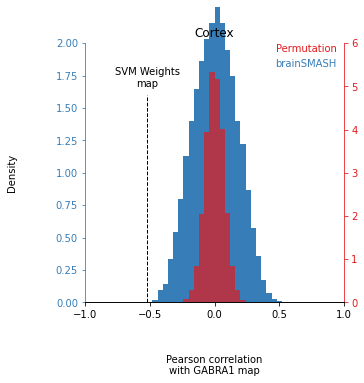

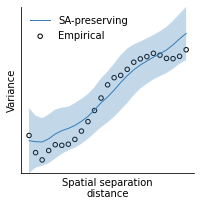

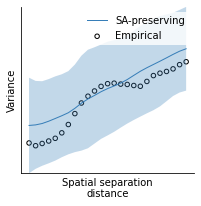

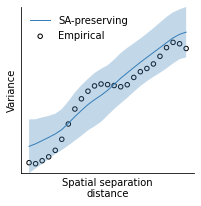

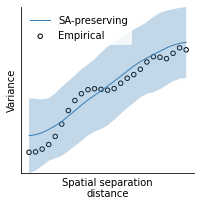

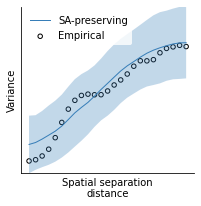

r =  -0.5179253895290664
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0
Critical surrogate brain map corr value =  0.27743745281772636


In [29]:
GABRA1 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA1.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA1,labels=["SVM Weights","GABRA1","Cortex"],pv=35,nh=25)

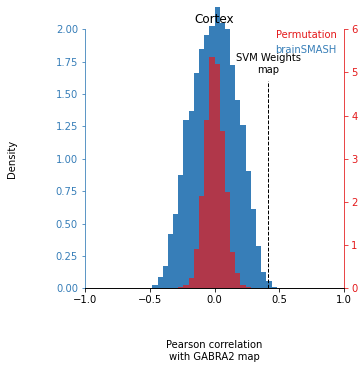

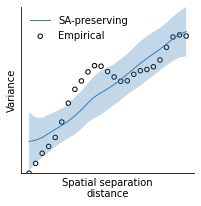

r =  0.4158216342323759
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0038
Critical surrogate brain map corr value =  0.27317490242981923


In [15]:
GABRA2 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA2.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA2,labels=["SVM Weights","GABRA2","Cortex"])

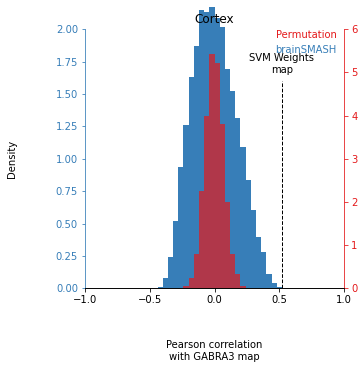

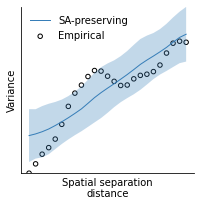

r =  0.5203110910274453
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0001
Critical surrogate brain map corr value =  0.2896747534528994


In [16]:
GABRA3 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA3.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA3,labels=["SVM Weights","GABRA3","Cortex"])

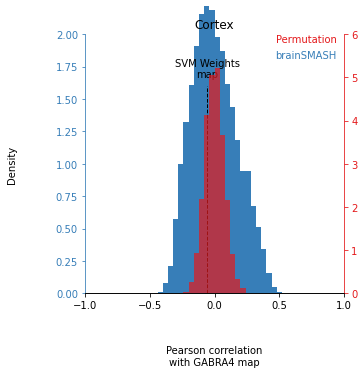

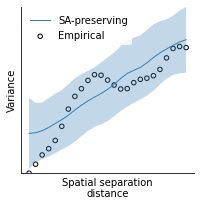

r =  -0.057448168491482654
Spatially naive p-value =  0.437
SA-corrected p-value =  0.7622
Critical surrogate brain map corr value =  0.30920734169835035


In [17]:
GABRA4 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA4.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA4,labels=["SVM Weights","GABRA4","Cortex"])

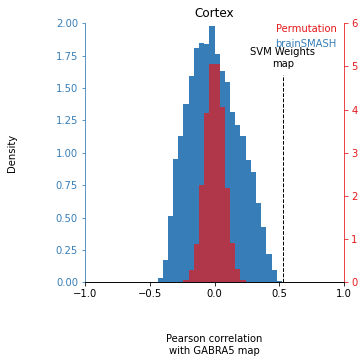

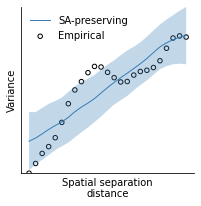

r =  0.5253869789506704
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0001
Critical surrogate brain map corr value =  0.32865068001276715


In [18]:
GABRA5 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA5.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA5,labels=["SVM Weights","GABRA5","Cortex"])

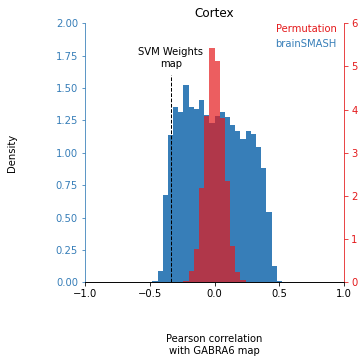

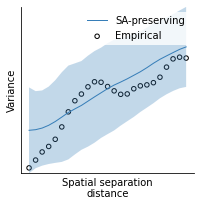

r =  -0.3385785922657645
Spatially naive p-value =  0.0
SA-corrected p-value =  0.1398
Critical surrogate brain map corr value =  0.37100070590702766


In [19]:
GABRA6 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA6.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA6,labels=["SVM Weights","GABRA6","Cortex"])

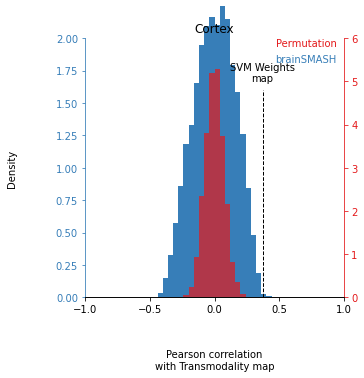

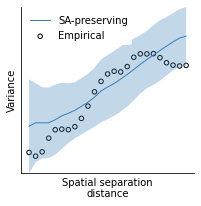

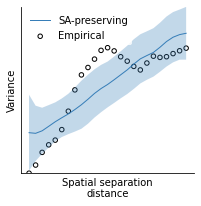

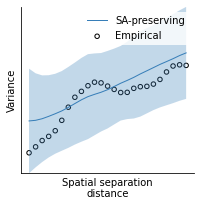

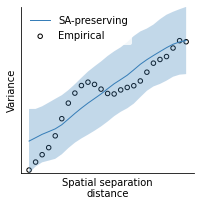

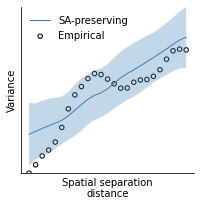

r =  0.37058329748067736
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0062
Critical surrogate brain map corr value =  0.25103716613569227


In [10]:
transmodality = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_transmodality.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=transmodality,labels=["SVM Weights","Transmodality","Cortex"])

In [9]:
transmodality_smash = np.loadtxt("surrogate_brainmap_corrs_Transmodality_map.txt")
max(transmodality_smash)
min(transmodality_smash)

-0.48934941589900877